# Semantic Segmentation in Dataloop's Python SDK


In [1]:
#importing Dataloop's Python Package and Numpy
import dtlpy as dl
import numpy as np


In [2]:
#Logging in to Dataloop (checks if token expired ~24h expiration time for token)
if dl.token_expired():
   dl.login()
#you can also use the simple login: 
#dl.login()

In [3]:
# Importing the Project and Dataset - change with your own project and dataset
project = dl.projects.get(project_name='CreatureHunt')

dataset = project.datasets.get(dataset_name='Creatures')

# Go search for your Item ID, by openinng the dataset inthe  webUI
#dataset.open_in_web()


In [4]:
#get the item - change the ID with your Item ID
item = dl.items.get(item_id='63eb694dbb4d84844887871d')

In [22]:

# Create a builder instance
builder = item.annotations.builder()
# Create polygon annotation with label
# with array of points: [[x1, y1], [x2, y2], ..., [xn, yn]]
builder.add(annotation_definition=dl.Polygon(geo=[[100, 50],
                                                  [500, 800],
                                                  [800, 50]],
                                             label='SomePoly'))

# Upload polygon to the item
item.annotations.upload(builder)


AnnotationCollection(item=Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/63e6283b4a03c631b54725ec', created_at='2023-02-14T10:58:21.000Z', dataset_id='63e6283b4a03c631b54725ec', filename='/098-696200529-scale10.00-k_euler_a-sd-v1-5-fp16.png', name='098-696200529-scale10.00-k_euler_a-sd-v1-5-fp16.png', type='file', id='63eb694dbb4d84844887871d', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=1), annotations=[Annotation(id='6454bd4fa55a8064d8edf0dd', item_id='63eb694dbb4d84844887871d', creator='myfuncont@gmail.com', created_at='2023-05-05T08:24:47.613Z', type='segment', item_height=1024, item_width=1024, label_suggestions=None, _start_frame=0, _start_time=0)])

In [6]:
#You can check the Annotation was added to your image using this line. It should be an Polygon.
item.open_in_web()

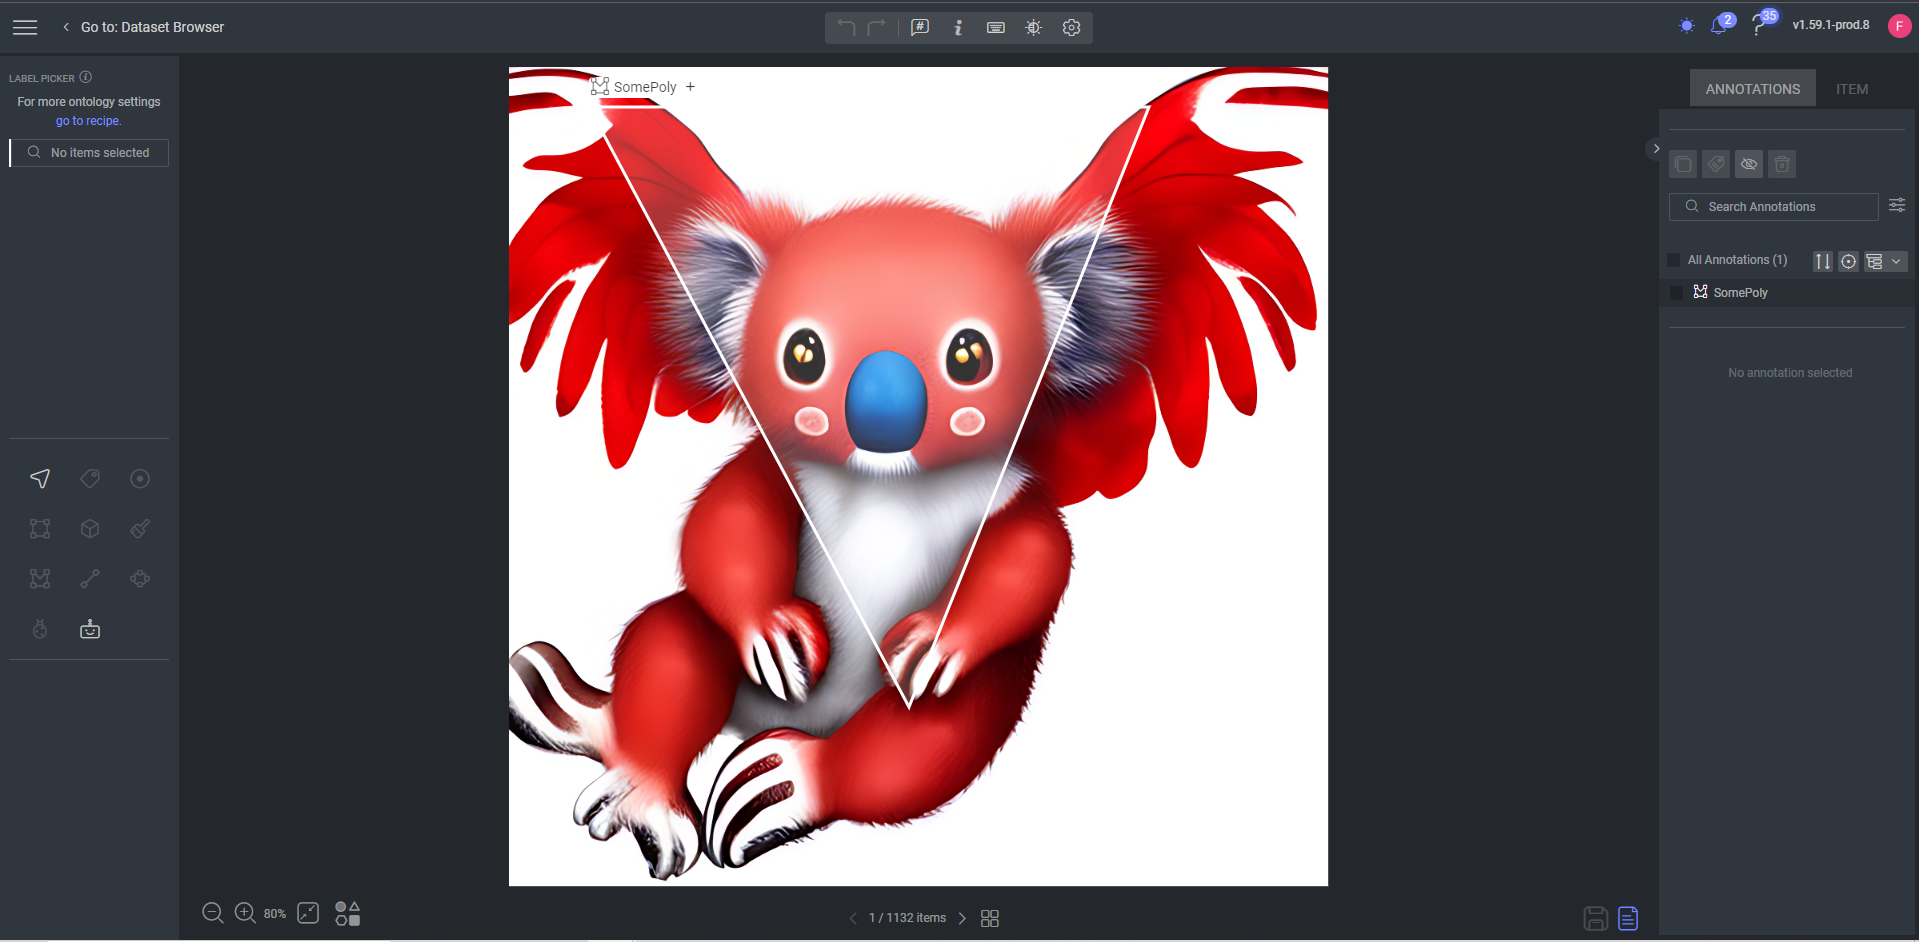

In [23]:

from PIL import Image

filters = dl.Filters()
# set resource
filters.resource = 'items'

# add filter - only files

filters.add(field='type', values='file')

# add annotation filters - only Items with polygon annotations

filters.add_join(field='type', values='segment')

# get results and add them to a page

pages = dataset.items.list(filters=filters)

# loop through all Items in the page and convert the polygon to a semantic mask

for page in pages:
    for item in page:
        print('item=' + item.id)
        annotations = item.annotations.list()
        item = dataset.items.get(item_id=item.id)
        buffer = item.download(save_locally=False)
        img = Image.open(buffer)
        builder = item.annotations.builder()
        # run over all annotation in item
        for annotation in annotations:
            # print(annotation)
            if annotation.type == 'segment':
                print("Found polygon annotation - id:", annotation.id)
                builder.add(dl.Segmentation.from_polygon(geo=annotation.annotation_definition.geo,
                                                         # binary mask of the annotation
                                                         label=annotation.label,
                                                         shape=img.size[::-1]  # (h,w)
                                                         ))
                annotation.delete()
        item.annotations.upload(annotations=builder)

Iterate Pages:   0%|                                                                             | 0/1 [00:00<?, ?it/s]item=63eb694dbb4d84844887871d

Download Items: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.45it/s]
Found polygon annotation - id: 6454bd4fa55a8064d8edf0dd
Iterate Pages: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.71it/s]


In [18]:
#update and list all annotations
annotations.update()
print(annotations)


AnnotationCollection(item=Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/63e6283b4a03c631b54725ec', created_at='2023-02-14T10:58:21.000Z', dataset_id='63e6283b4a03c631b54725ec', filename='/098-696200529-scale10.00-k_euler_a-sd-v1-5-fp16.png', name='098-696200529-scale10.00-k_euler_a-sd-v1-5-fp16.png', type='file', id='63eb694dbb4d84844887871d', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=1), annotations=[Annotation(id='6454ba5f4fc3ac46b9382c44', item_id='63eb694dbb4d84844887871d', creator='myfuncont@gmail.com', created_at='2023-05-05T08:12:15.255Z', type='segment', item_height=None, item_width=None, label_suggestions=None, _start_frame=0, _start_time=0)])


In [ ]:
# Open the item in web, to see the change. The Annotation should now be a Semantic Segmentation
item.open_in_web()

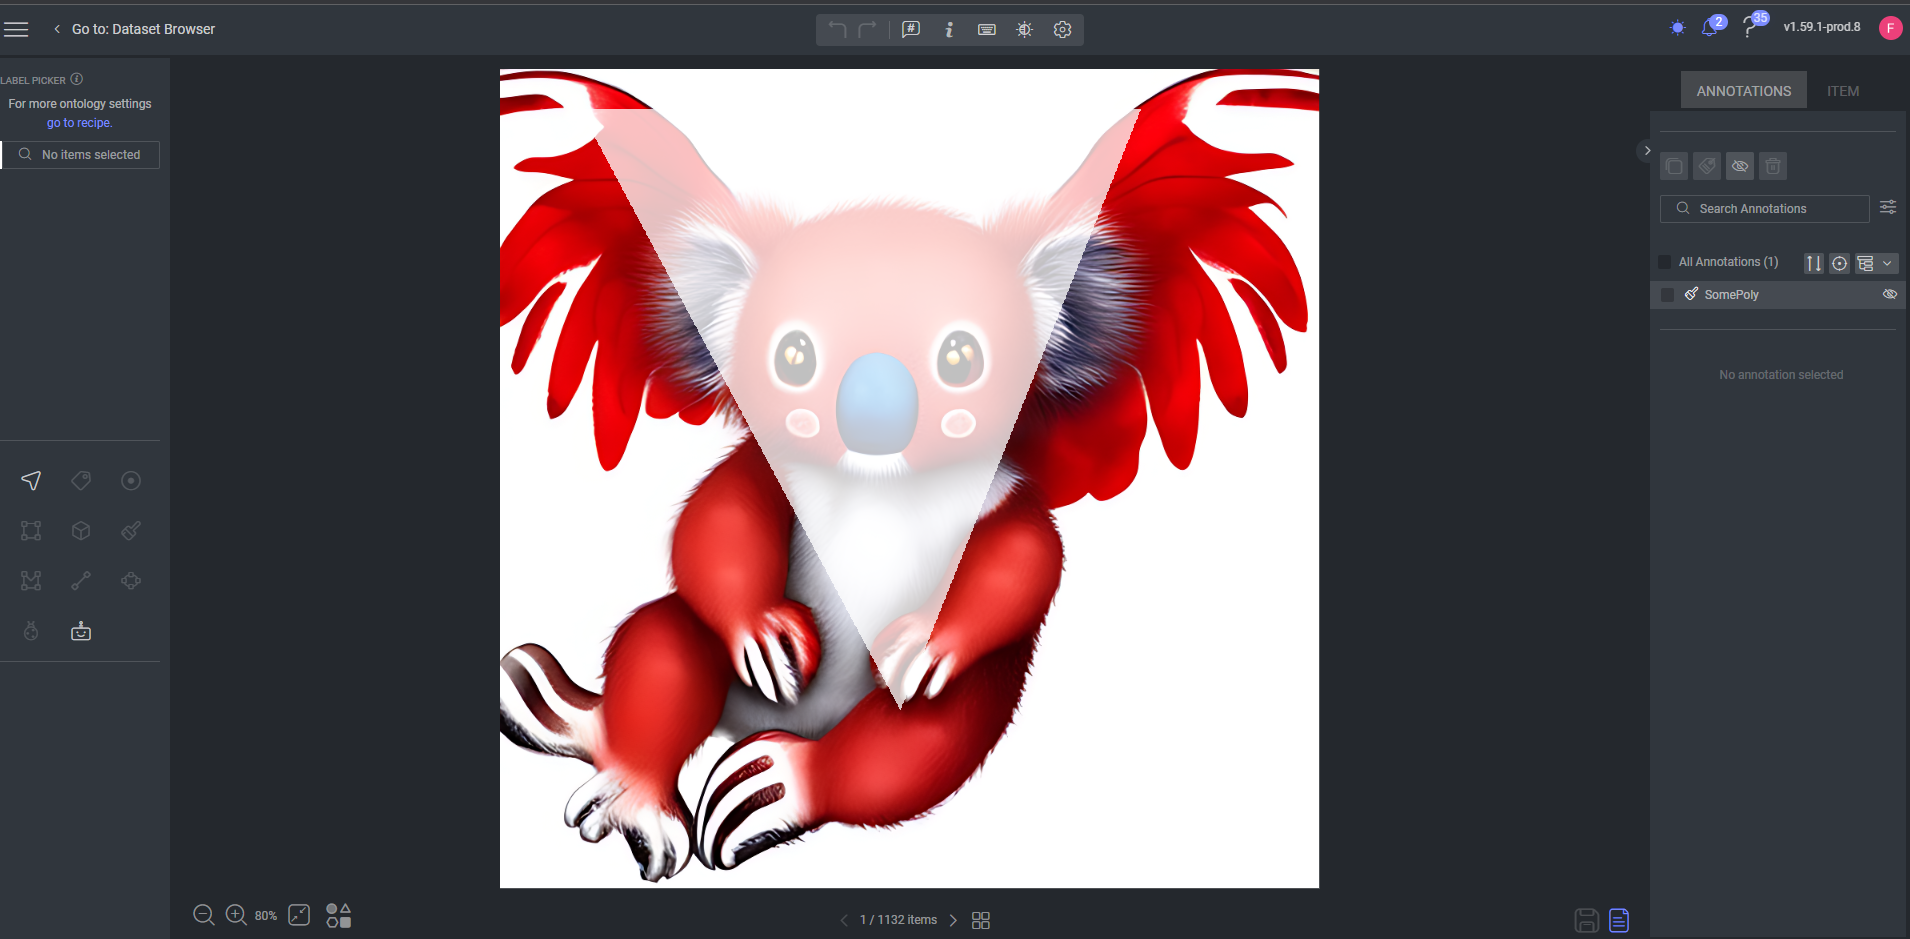

### Congrats, you just create a Semantic Segmentation Annotation in Dataloop!